<a href="https://colab.research.google.com/github/vijaylokith/Customer-Churn-Prediction/blob/main/Customer_churn_prediction_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Customer Churn Prediction : E - Commerce*** 

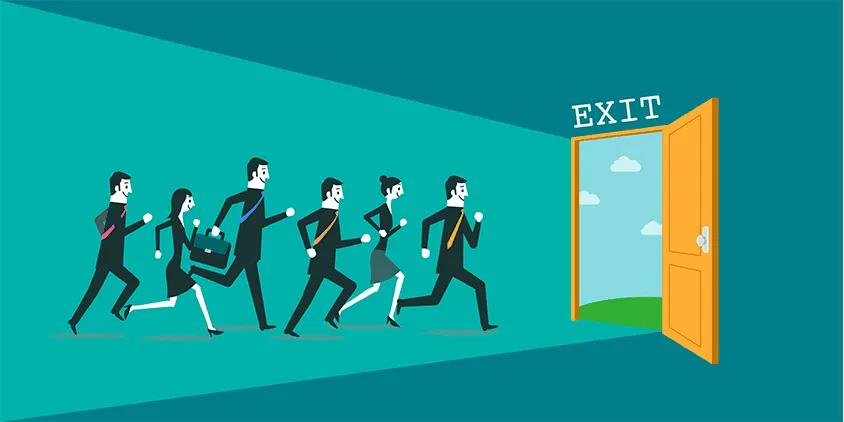

## **1) Business Problem Statement**

### **1.1) Introduction**


> When customers or subscribers stop doing business with a company or service, it is known as customer churn.


> In e-commerce, customers have a range of service providers to pick from and can actively switch between them.
In this fiercely competitive sector, the e-commerce industry has an annual churn rate of 3.35 percent to 12.71 percent.

> Although it is very hard to keep track of every individual, if businesses can identify the consumers who may leave, they may concentrate their marketing efforts on them, which will have a significant positive effect on their bottom line.

> Hence the problem of customer churn prediction becomes an integral part of a business development


## **2) Business Objective & Constrains**

### **2.1) Problem  Statement**



> We are tasked to build a model to predict customer churn.



### **2.2) Business Constrains**

> Low Latency Requirment (Low)

> Cost of Mis-classification (Medium - High)

> Interpretability (Medium - High)

## **3) Mapping a Real World to a Machine Learning Problem**

### **3.1) Type of Machine Learning Problem**

> This is a Binary Classification Problem (churn or not churn).

### **3.2) Performance Metric**

> Log-Loss (KPI - Key Performance Indicator)**

> Confusion Matrix (Secondary Mertic - to understand our model behaviour)*

> Percentage of Mis-classified Points (1-Accuracy)

## **4) Data Loading**

### **4.1) Importing the Necessary Libraries**

In [74]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [128]:
from sklearn.neighbors import KNeighborsRegressor

### **4.2) Reading the Data**

In [77]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Customer churn prediction : E - Commerce/E Commerce dataframe.xlsx")
print(df.shape)
df.head()

(5630, 20)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


We can clearly see some features(Tenure) have NaN(not a number == NULL) value, we can treat it in the next step(data cleaning)

In [78]:
feature_description = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Customer churn prediction : E - Commerce/feature description.xlsx",header=1)
feature_description.drop("Unnamed: 0",axis=1)

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


## **5) Data Celaning**

In [79]:
# Checking for duplicates in the data

print(f"Number of duplicate row's in the dataset: {df.duplicated().sum()}")

Number of duplicate row's in the dataset: 0


In [80]:
# Checking for NULL values

df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

We can clearly see that 7 out of 20 features have missing values.

In [81]:
missing_values = df.columns[df.isnull().any()].tolist()
missing_values

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']

In [82]:
df[missing_values].head(10)

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
0,4.0,6.0,3.0,11.0,1.0,1.0,5.0
1,NaN,8.0,3.0,15.0,0.0,1.0,0.0
2,NaN,30.0,2.0,14.0,0.0,1.0,3.0
3,0.0,15.0,2.0,23.0,0.0,1.0,3.0
4,0.0,12.0,NaN,11.0,1.0,1.0,3.0
5,0.0,22.0,3.0,22.0,4.0,6.0,7.0
6,NaN,11.0,2.0,14.0,0.0,1.0,0.0
7,NaN,6.0,3.0,16.0,2.0,2.0,0.0
8,13.0,9.0,NaN,14.0,0.0,1.0,2.0
9,NaN,31.0,2.0,12.0,1.0,1.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f34c6a528d0>,
      dtype=object)

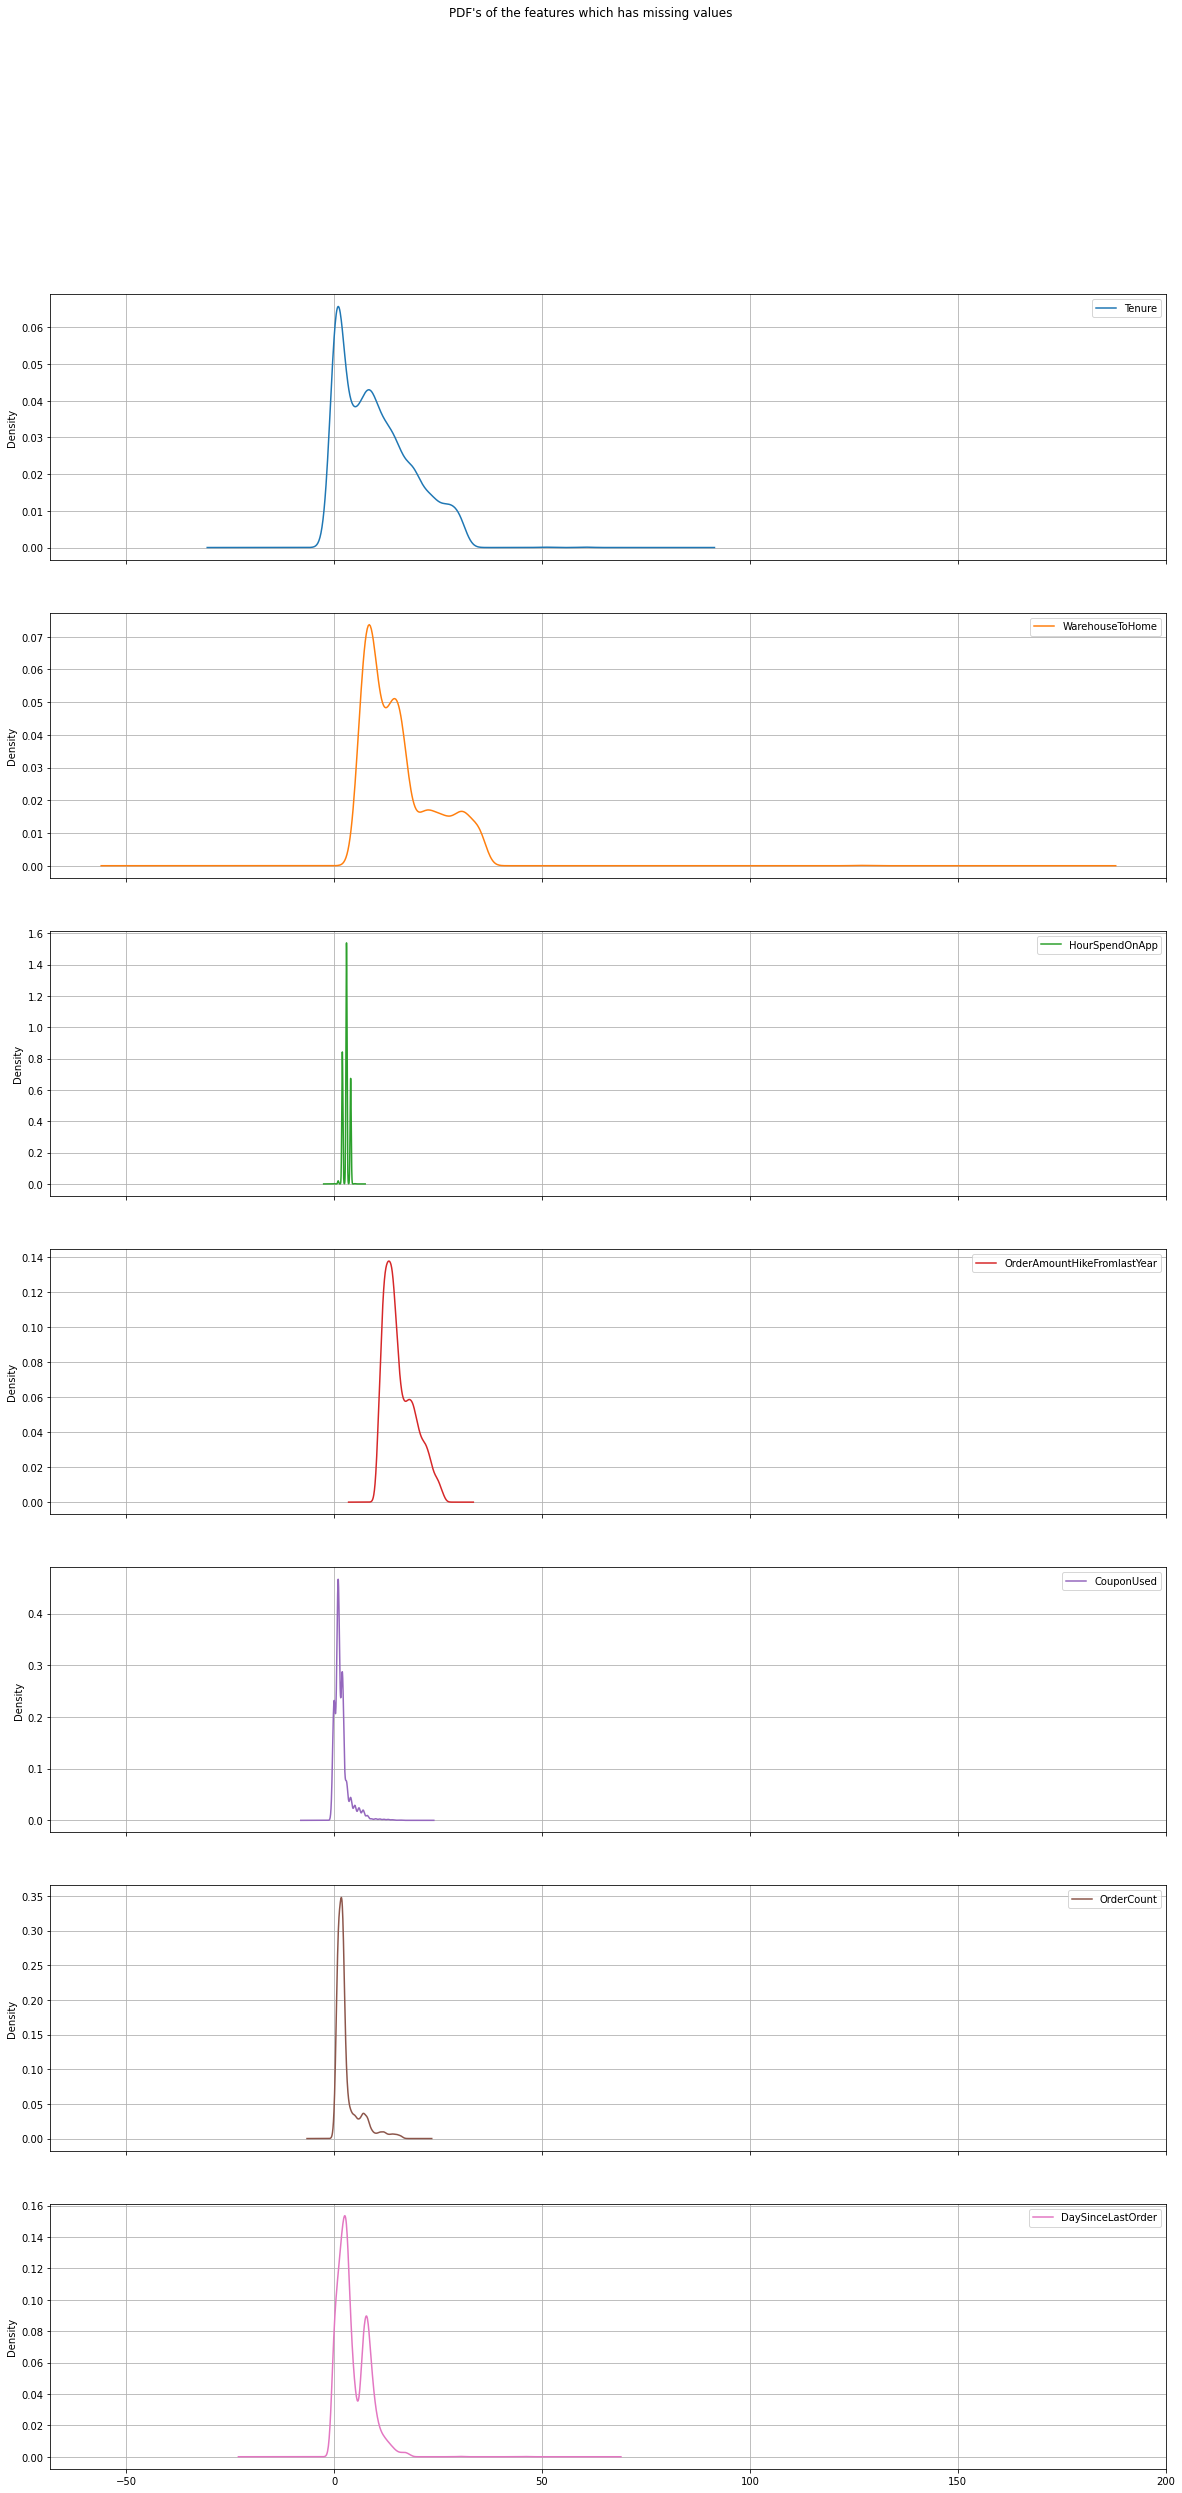

In [83]:
# Before handling the missing values we will look at the distribution of the feature which has missing values

df[missing_values].plot.kde(subplots=True,grid=True,title="PDF's of the features which has missing values", figsize=(20,40))

> From the above plot, we can clearly see that out of the 7 features almost all of them are slightly or medium-right skewed.

> In right skewed distributions typically (mean > median > mode)

> For features like {"Tenure", "WarehouseToHome", "HourSpendOnApp","OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount"} (almost normally distributed) we can replace the missing value's with the median of that feature.

> For remaining feature is {"DaySinceLastOrder"}, it has two peaks which are skewed so we can use model based imputation instead of a normal mean/median based imputation. In model based imputation we can use a simple model like K-NN to predict the missing values.

In [123]:
# Replacing the missing values of {"Tenure", "WarehouseToHome", "HourSpendOnApp","OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount"} with their median value

normal_missing_features = ["Tenure", "WarehouseToHome", "HourSpendOnApp","OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount"]
for i in normal_missing_features:
  df[i].fillna(df[i].median(), inplace=True)

df[missing_values].head(10)

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
0,4.0,6.0,3.0,11.0,1.0,1.0,5.0
1,9.0,8.0,3.0,15.0,0.0,1.0,0.0
2,9.0,30.0,2.0,14.0,0.0,1.0,3.0
3,0.0,15.0,2.0,23.0,0.0,1.0,3.0
4,0.0,12.0,3.0,11.0,1.0,1.0,3.0
5,0.0,22.0,3.0,22.0,4.0,6.0,7.0
6,9.0,11.0,2.0,14.0,0.0,1.0,0.0
7,9.0,6.0,3.0,16.0,2.0,2.0,0.0
8,13.0,9.0,3.0,14.0,0.0,1.0,2.0
9,9.0,31.0,2.0,12.0,1.0,1.0,1.0


In [132]:
# Model based imputation (K-NN with default K)

skewed_missing_features = []

df1 = df.copy()

In [139]:
df1 = df1.drop(["CustomerID","PreferredLoginDevice","PreferredPaymentMode",	"Gender",	"PreferedOrderCat","MaritalStatus"],axis=1)

In [140]:
dslo_missing = df1["DaySinceLastOrder"].isnull().values
dslo_missing_list = df1["DaySinceLastOrder"].iloc[dslo_missing].index
dslo_missing_list

Int64Index([  88,   97,  126,  146,  151,  182,  188,  216,  227,  295,
            ...
            5544, 5545, 5554, 5556, 5574, 5591, 5608, 5610, 5623, 5626],
           dtype='int64', length=307)

In [141]:
df2 = df1.copy()
df2 = df2.drop(labels=dslo_missing_list)
print(df2.shape)

df3 = df1.loc[dslo_missing_list]
df3.shape

(5323, 14)


(307, 14)

In [ ]:
df2

In [142]:
df2_x = df2.drop("DaySinceLastOrder",axis=1)
df2_y = df2["DaySinceLastOrder"]

df3_x = df3.drop("DaySinceLastOrder",axis=1)

In [158]:
model_imputation = KNeighborsRegressor()
model_imputation.fit(df2_x,df2_y)
result = model_imputation.predict(df3_x)

In [164]:
result = result.round()
result

array([ 4.,  9.,  6.,  7.,  5.,  4.,  9.,  8.,  5.,  4.,  4.,  3.,  5.,
        8.,  5., 10., 12.,  3.,  4.,  8.,  5.,  8.,  2.,  3., 15.,  5.,
        8.,  6.,  7.,  4., 12.,  2.,  5.,  8.,  7.,  7., 10., 12.,  4.,
        9.,  6.,  7.,  4.,  4.,  8.,  8.,  5.,  2.,  4.,  3.,  3.,  5.,
        8.,  5., 10., 10.,  3.,  5.,  8.,  5., 11.,  2.,  3., 15.,  5.,
        8.,  7.,  7.,  4., 12.,  2.,  5.,  8.,  8.,  8., 10.,  6.,  7.,
        2.,  8.,  7.,  8.,  6.,  7., 10.,  5.,  6., 12., 11.,  7.,  9.,
       10., 10.,  8., 12.,  8.,  6.,  7.,  6.,  5.,  6.,  9.,  8.,  8.,
        8., 12.,  6.,  8., 11.,  5.,  5., 12.,  3.,  7.,  8.,  6., 10.,
       12.,  8.,  7.,  6.,  7.,  6.,  8.,  7.,  3.,  6., 14.,  8., 12.,
       10.,  2.,  7.,  9.,  7.,  6., 12., 11.,  4.,  5., 12.,  8.,  5.,
        7.,  9.,  2.,  4.,  5.,  4.,  6., 11., 12.,  9., 16.,  5.,  4.,
        9.,  6.,  9.,  9.,  8.,  7.,  6.,  5.,  4.,  4.,  5., 12.,  7.,
        7., 13.,  6.,  6., 10.,  9., 13., 11., 12.,  3.,  5.,  8

In [169]:
for i,j in enumerate(dslo_missing_list):
  df["DaySinceLastOrder"].loc[j] = result[i]

df.head(11)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,9.0,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,9.0,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,3.0,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,9.0,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [170]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

> As we can see all the null values are replaced either by median or by model based imputation (personally this model based imputation gives better results than a simple mean/median based imputation)

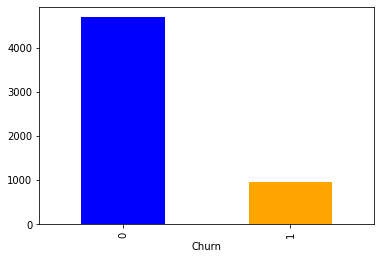

In [175]:
# Check for data balance

df.groupby("Churn")["CustomerID"].count().plot.bar(color=['blue','orange'])

In [187]:
unchurn_count = (df.groupby("Churn")["CustomerID"].count()[0] / df.shape[0])*100
print(f"In the whole data set {np.round_(unchurn_count)} % of the points belong to Unchurn and the rest {np.round_(100-unchurn_count)} % of the points belong to Churn")

In the whole data set 83.0 % of the points belong to Unchurn and the rest 17.0 % of the points belong to Churn


> We can conclude that our data is highly imbalanced. But this is common in problems like cancer prediction, fraud detection, customer churn prediction, etc. In these types of problems mostly the affected class will be smaller than the non-affected class.

> So should we balance the data or not? 

> This is a debatable topic, sometimes syntactically balanced data will perform better and sometimes the imbalanced data will perform better. So as a part of this project, we will try both and pick the one which has good performance and generalization

We will balance the data in the modelling preparation stage

## **6) Basic Exploratory Data Analysis - I**

In [188]:
df.shape

(5630, 20)

In [193]:
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,9.0,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,9.0,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,3.0,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,9.0,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [192]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

> Before starting the Avanced Analysis we should diferenciate the numerical and categorical features. So we can run a deep, seperate feature type specific analysis.

In [221]:
numerical_features = []
categorical_features = []

for i in df.columns:
  if len(df[i].unique()) < 8:
    categorical_features.append(i)
  else:
    numerical_features.append(i)

print(f"Out of 20 features we have {len(categorical_features)} categorical feature which are:")
print(categorical_features)
print()
print()
print(f"Out of 20 features we have {len(numerical_features)} categorical feature which are:")
print(numerical_features)

Out of 20 features we have 11 categorical feature which are:
['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']


Out of 20 features we have 9 categorical feature which are:
['CustomerID', 'Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [227]:
for i in df.columns:
  print(f"{i} -> {df[i].unique()} -> {len(df[i].unique())}")
  print()

CustomerID -> [50001 50002 50003 ... 55628 55629 55630] -> 5630

Churn -> [1 0] -> 2

Tenure -> [ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.] -> 36

PreferredLoginDevice -> ['Mobile Phone' 'Phone' 'Computer'] -> 3

CityTier -> [3 1 2] -> 3

WarehouseToHome -> [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.] -> 34

PreferredPaymentMode -> ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card'] -> 7

Gender -> ['Female' 'Male'] -> 2

HourSpendOnApp -> [3. 2. 1. 0. 4. 5.] -> 6

NumberOfDeviceRegistered -> [3 4 5 2 1 6] -> 6

PreferedOrderCat -> ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery'] -> 6

SatisfactionScore -> [2 3 5 4 1] -> 5

MaritalStatus -> ['Single' 'Divorced' 'Married'] -> 3

NumberOfAddress -> [ 9  7  6  